# 提取midi文件中的訊息和時間

In [1]:
import os
import mido
import pretty_midi
import mir_eval.display
import librosa.display
import matplotlib.pyplot as plt
import IPython.display
import numpy as np
import pandas as pd
from mido import MidiFile
from mido import MetaMessage
from mido import tempo2bpm, bpm2tempo

In [138]:
# 左右手音符都在同一個track，可以用channel=0或channel=1去判斷
def analyzemidi(path=""):
    mid = MidiFile(path)
    txt = path.split('/')
    midiname = txt[-1]

    count1 = 0
    count2 = 0

    for i, track in enumerate(mid.tracks):
        print('Track {}: {}'.format(i, midiname))
        passed_time = 0
        passed_time2 = 0

        for info in track:
            if info.type == "set_tempo":
                tempo = info.tempo
                print("Tempo:", tempo)
                print("Bpm:", tempo2bpm(info.tempo))
                print('Ticks_per_beat:', mid.ticks_per_beat)
                print()

        for msg in track:
            #print(msg)
            #print(count)

            # 把tick單位轉成second單位
            ab_time = mido.tick2second(msg.time, mid.ticks_per_beat, tempo)

            y = ab_time

            # real_time是每一個事件在整個midi文件中的真實時間位置
            real_time = ab_time + passed_time
            passed_time += ab_time

            # channel == 0右手、channel == 1左手
            if msg.type == "note_on":
                channel = msg.channel
                velocity = msg.velocity
                note = msg.note
                # 右手
                if channel == 0:
                    x = passed_time
                    print("note = {0:3}  |  real time = {1:<8}".format(note, round(real_time, 3)))
                    count1 += 1
        if count1 != 0:
            print('Midi Length (R):', real_time)
            print('Count1:', count1)
            print()
        
        for msg in track:
            #print(msg)
            #print(count)

            # 把tick單位轉成second單位
            ab_time2 = mido.tick2second(msg.time, mid.ticks_per_beat, tempo)

            y2 = ab_time2

            # real_time是每一個事件在整個midi文件中的真實時間位置
            real_time2 = ab_time2 + passed_time2
            passed_time2 += ab_time2

            # channel == 0右手、channel == 1左手
            if msg.type == "note_on":
                channel = msg.channel
                velocity = msg.velocity
                note = msg.note
                # 左手
                if channel == 1:
                    x2 = passed_time2
                    print("note = {0:3}  |  real time = {1:<8}".format(note, round(real_time2, 3)))
                    count2 += 1
        if count2 != 0:
            print('Midi Length (L):', real_time2)
            print('Count2:', count2)

In [2]:
# 左右手音符都在同一個track，可以用channel=0或channel=1去判斷
def analyzemidi(path=""):
    mid = MidiFile(path)
    txt = path.split('/')
    midiname = txt[-1]

    count1 = 0
    count2 = 0
    final_R_list = []
    final_L_list = []
    
    for i, track in enumerate(mid.tracks):
        print('Track {}: {}'.format(i, midiname))
        passed_time = 0
        passed_time2 = 0

        for info in track:
            if info.type == "set_tempo":
                tempo = info.tempo
                print("Tempo:", tempo)
                print("Bpm:", tempo2bpm(info.tempo))
                print('Ticks_per_beat:', mid.ticks_per_beat)
                print()

        for msg in track:
            '''
            if msg.type == "note_on":
                print(msg)
            #print(count)
            '''
            
            # 把tick單位轉成second單位
            ab_time = mido.tick2second(msg.time, mid.ticks_per_beat, tempo)

            y = ab_time

            # real_time是每一個事件在整個midi文件中的真實時間位置
            real_time = ab_time + passed_time
            passed_time += ab_time
            R_list = []
            
            # channel == 0右手、channel == 1左手
            if msg.type == "note_on":
                channel = msg.channel
                velocity = msg.velocity
                note = msg.note
                # 右手
                if channel == 0:
                    x = passed_time
                    print("note = {0:3}  |  real time = {1:<8}".format(note, round(real_time, 3)))
                    R_list.append(note)
                    R_list.append(real_time)
                    count1 += 1
                    final_R_list.append(R_list)
        
        if count1 != 0:
            print('Midi Length (R):', real_time)
            print('Count1:', count1)
            print()
        
        for msg in track:
            #print(msg)
            #print(count)

            # 把tick單位轉成second單位
            ab_time2 = mido.tick2second(msg.time, mid.ticks_per_beat, tempo)

            y2 = ab_time2

            # real_time是每一個事件在整個midi文件中的真實時間位置
            real_time2 = ab_time2 + passed_time2
            passed_time2 += ab_time2
            L_list = []
            
            # channel == 0右手、channel == 1左手
            if msg.type == "note_on":
                channel = msg.channel
                velocity = msg.velocity
                note = msg.note
                # 左手
                if channel == 1:
                    x2 = passed_time2
                    print("note = {0:3}  |  real time = {1:<8}".format(note, round(real_time2, 3)))
                    L_list.append(note)
                    L_list.append(real_time2)
                    count2 += 1
                    final_L_list.append(L_list)
        
        if count2 != 0:
            print('Midi Length (L):', real_time2)
            print('Count2:', count2)
    
    return final_R_list,final_L_list

In [5]:
analyzemidi('MIDI/20191219_ForTest/Thelazysong.mid')

Track 0: Thelazysong.mid
Tempo: 685714
Bpm: 87.50003645834852
Ticks_per_beat: 480

note =  56  |  real time = 32.571  
note =  56  |  real time = 32.647  
note =  58  |  real time = 32.743  
note =  58  |  real time = 32.82   
note =  59  |  real time = 32.914  
note =  59  |  real time = 33.084  
note =  59  |  real time = 33.257  
note =  59  |  real time = 33.427  
note =  59  |  real time = 33.6    
note =  59  |  real time = 33.786  
note =  59  |  real time = 33.943  
note =  59  |  real time = 34.124  
note =  58  |  real time = 34.286  
note =  58  |  real time = 34.461  
note =  56  |  real time = 34.629  
note =  56  |  real time = 34.814  
note =  58  |  real time = 34.971  
note =  58  |  real time = 35.111  
note =  59  |  real time = 35.314  
note =  59  |  real time = 35.716  
note =  56  |  real time = 35.829  
note =  56  |  real time = 35.904  
note =  52  |  real time = 36.0    
note =  52  |  real time = 36.47   
note =  64  |  real time = 60.343  
note =  61  |  re

note =  42  |  real time = 116.571 
note =  42  |  real time = 116.789 
note =  42  |  real time = 116.914 
note =  42  |  real time = 117.214 
note =  42  |  real time = 117.6   
note =  42  |  real time = 117.64  
note =  42  |  real time = 117.771 
note =  42  |  real time = 117.914 
note =  40  |  real time = 117.943 
note =  40  |  real time = 118.131 
note =  40  |  real time = 118.286 
note =  40  |  real time = 118.573 
note =  35  |  real time = 119.143 
note =  35  |  real time = 119.233 
note =  40  |  real time = 119.314 
note =  40  |  real time = 119.506 
note =  40  |  real time = 119.657 
note =  40  |  real time = 119.939 
note =  39  |  real time = 120.0   
note =  39  |  real time = 120.307 
note =  40  |  real time = 120.343 
note =  40  |  real time = 120.653 
note =  37  |  real time = 120.686 
note =  37  |  real time = 120.921 
note =  37  |  real time = 121.029 
note =  37  |  real time = 121.229 
note =  32  |  real time = 121.371 
note =  32  |  real time = 1

([[56, 32.571414999999995],
  [56, 32.64712925416666],
  [58, 32.74284349999999],
  [58, 32.81998632499999],
  [59, 32.91427199999999],
  [59, 33.08427192916666],
  [59, 33.257129],
  [59, 33.42712892916666],
  [59, 33.599985999999994],
  [59, 33.785700208333324],
  [59, 33.94284299999999],
  [59, 34.12427149583332],
  [58, 34.285699999999984],
  [58, 34.46141421249998],
  [56, 34.62855699999998],
  [56, 34.81427120833331],
  [58, 34.971413999999974],
  [58, 35.11141394166664],
  [59, 35.31427099999997],
  [59, 35.71569940416663],
  [56, 35.82855649999996],
  [56, 35.90427075416663],
  [52, 35.99998499999997],
  [52, 36.46998480416663],
  [64, 60.342831999999575],
  [61, 60.342831999999575],
  [64, 61.70997428749954],
  [66, 61.71425999999954],
  [63, 61.71425999999954],
  [61, 61.747117129166206],
  [63, 63.0285451666662],
  [64, 63.08568799999953],
  [68, 63.08568799999953],
  [66, 63.101402279166194],
  [64, 64.44854457499953],
  [66, 64.45711599999953],
  [70, 64.45711599999953],
 

In [6]:
# 查看midi檔案總長度(回傳MIDI檔案中最後一個元素的時間值)
pm = pretty_midi.PrettyMIDI('MIDI/20191219_ForTest/Thelazysong.mid')
time = pm.get_end_time()
print('midi檔案總長度:',time)

midi檔案總長度: 202.91991545


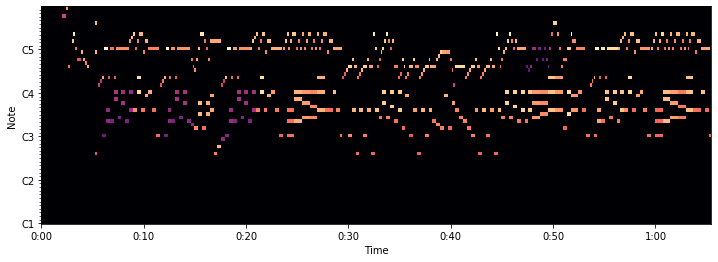

In [141]:
def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # 使用librosa的specshow函式用於顯示piano roll鋼琴卷
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))
plt.figure(figsize=(12, 4))
plot_piano_roll(pm, 24, 84)